In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

train_data_path = 'titanic3.csv'
train_data = pd.read_csv(train_data_path)

In [2]:

train_data


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


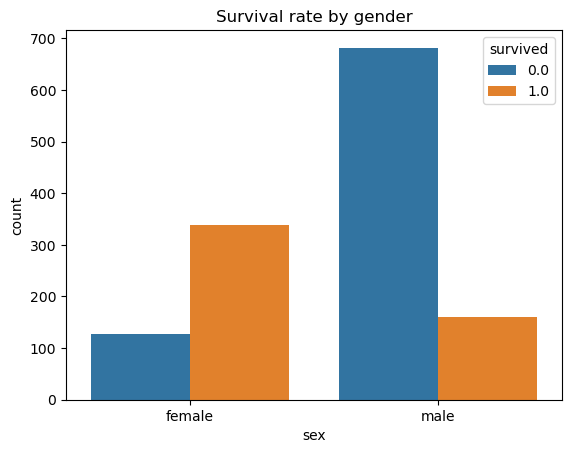

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sex', hue='survived', data=train_data)
plt.title('Survival rate by gender')
plt.show()


In [4]:
train_data.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [5]:
train_data['age'].fillna(train_data['age'].median(), inplace=True)
train_data['age']



0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1305    28.0000
1306    26.5000
1307    27.0000
1308    29.0000
1309    28.0000
Name: age, Length: 1310, dtype: float64

In [6]:
train_data["age"].isnull().sum()

0

In [7]:
embarked = train_data['embarked'].mode()[0]
train_data['embarked'].fillna(embarked, inplace=True)
train_data["embarked"].isnull().sum()

0

In [8]:
train_data['sex'] = train_data['sex'].fillna('female').map({'female': 0, 'male': 1}).astype(int)
train_data['sex']


0       0
1       1
2       0
3       1
4       0
       ..
1305    0
1306    1
1307    1
1308    1
1309    0
Name: sex, Length: 1310, dtype: int32

In [9]:
# Drop rows with NaN values in the specified columns
train_data = train_data.dropna(subset=['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare'])


In [10]:
train_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1013
embarked        0
boat          822
body         1188
home.dest     563
dtype: int64

In [11]:

embarked_dummies = pd.get_dummies(train_data['embarked'], prefix='embarked')
train_data = pd.concat([train_data, embarked_dummies], axis=1)
train_data.drop('embarked', axis=1, inplace=True)
train_data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'boat', 'body', 'home.dest', 'embarked_C',
       'embarked_Q', 'embarked_S'],
      dtype='object')

In [12]:
#Create a new feature 'FamilySize' that combines 'SibSp' and 'Parch'
train_data['FamilySize'] = train_data['sibsp'] + train_data['parch'] + 1
train_data['FamilySize']

0       1.0
1       4.0
2       4.0
3       4.0
4       4.0
       ... 
1304    2.0
1305    2.0
1306    1.0
1307    1.0
1308    1.0
Name: FamilySize, Length: 1308, dtype: float64

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = train_data.drop(columns=['survived', 'name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'])
y = train_data['survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.7901


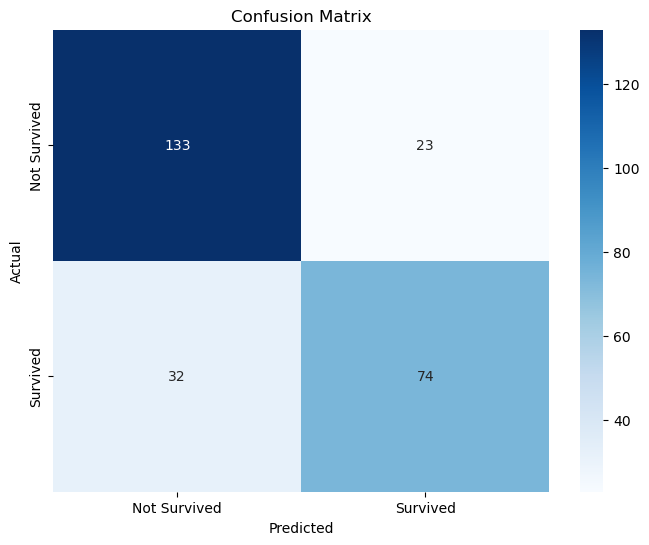

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [16]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(importance_df)


      Feature  Importance
0      pclass    0.065844
1         sex    0.272184
2         age    0.252896
3       sibsp    0.026973
4       parch    0.029768
5        fare    0.263449
6  embarked_C    0.016823
7  embarked_Q    0.006313
8  embarked_S    0.014487
9  FamilySize    0.051263
